Chapter 32
# 斜面等高线 + x1x3等高线
Book_2《可视之美》 | 鸢尾花书：从加减乘除到机器学习  

In [1]:
from scipy.stats import dirichlet
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib import cm

import os
# 如果文件夹不存在，创建文件夹
if not os.path.isdir("Figures"):
    os.makedirs("Figures")

In [2]:

###patch start###
from mpl_toolkits.mplot3d.axis3d import Axis

def _get_coord_info_new(self, renderer):
    mins, maxs, cs, deltas, tc, highs = self._get_coord_info_old(renderer)
    correction = deltas * [0.25,
                           0.25,
                           0.25]
    mins += correction
    maxs -= correction
    return mins, maxs, cs, deltas, tc, highs
if not hasattr(Axis, "_get_coord_info_old"):
    Axis._get_coord_info_old = Axis._get_coord_info  
Axis._get_coord_info = _get_coord_info_new
###patch end###

In [3]:
theta_1_array = np.linspace(0,1,1001)
theta_2_array = np.linspace(0,1,1001)
tt1,tt2 = np.meshgrid(theta_1_array,theta_2_array)
tt3 = 1 - tt1 - tt2
mask = ((tt3 > 1) | (tt3 < 0))
tt1[mask] = None
tt2[mask] = None
tt3[mask] = None

### 自定义可视化函数

In [4]:
def visualize_Dirichlet(alpha_array, num = 50):
    
    PDF = dirichlet.pdf([tt1.ravel(),tt2.ravel(),tt3.ravel()], alpha_array)
    
    fig = plt.figure(figsize=(5, 5))

    all_contours = plt.contour(tt1, tt2, PDF.reshape(tt1.shape),
                 levels = 20, 
                 cmap='RdYlBu_r')
    
    plt.clf() 
    
    norm = Normalize(vmin=all_contours.levels.min(), 
                                       vmax=all_contours.levels.max(), 
                                       clip=True)
    mapper = cm.ScalarMappable(norm=norm, cmap=cm.RdYlBu_r)

    ax = plt.axes(projection="3d")
    
    ax.contour(tt1, PDF.reshape(tt1.shape), tt3, zdir = 'y', offset = 0,
                 levels = 20, zorder = 1,
                 cmap='RdYlBu_r')

    for level_idx, ctr_idx in zip(all_contours.levels,
                                  all_contours.allsegs):

        for i in range(0,len(ctr_idx)):

            t1_i,t2_i = ctr_idx[i][:,0],ctr_idx[i][:,1]
            t3_i = 1 - t1_i - t2_i

            # 绘制映射结果
            ax.plot(t1_i, t2_i, t3_i,
                    color = mapper.to_rgba(level_idx),
                    linewidth = 1, zorder = 1000)        

    ax.set_proj_type('ortho')
    ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.plot((1,0),(0,1),(0,0),lw = 1,c = 'k')
    ax.plot((0,0),(1,0),(0,1),lw = 1,c = 'k')
    ax.plot((1,0),(0,0),(0,1),lw = 1,c = 'k')

    ax.set_xticks([0,1])
    ax.set_yticks([0,1])
    ax.set_zticks([0,1])

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_zlim(0, 1)
    # ax.view_init(azim=20, elev=20)
    ax.view_init(azim=30, elev=30)
    ax.set_xlabel(r'$\theta_1$')
    ax.set_ylabel(r'$\theta_2$')
    ax.set_zlabel(r'$\theta_3$')
    
    ax.set_box_aspect(aspect = (1,1,1))

    ax.grid()
    title = '_'.join(str(v) for v in alpha_array)
    title = 'alphas_' + title

    fig.savefig('Figures/斜面等高线 + 13水平等高线_' + title + '.svg', format='svg')
    

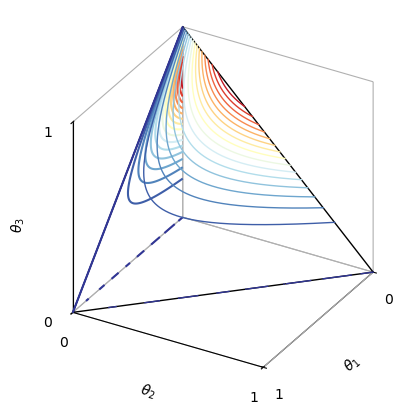

In [5]:
alpha_array = [1, 2, 4]
visualize_Dirichlet(alpha_array)

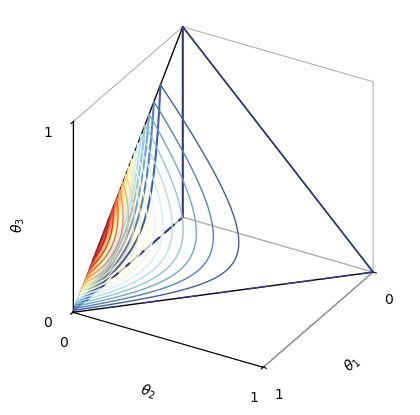

In [6]:
alpha_array = [4,1,2]
visualize_Dirichlet(alpha_array)

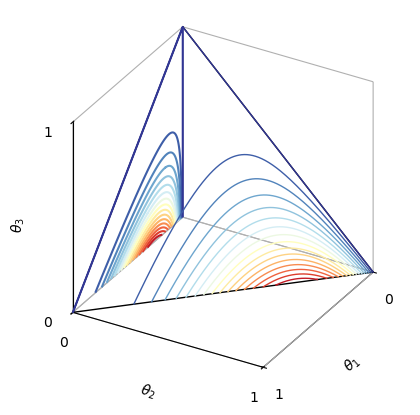

In [7]:
alpha_array = [2,4,1]
visualize_Dirichlet(alpha_array)

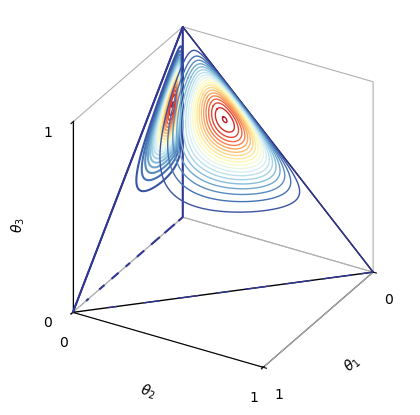

In [8]:
alpha_array = [2,4,8]
visualize_Dirichlet(alpha_array)

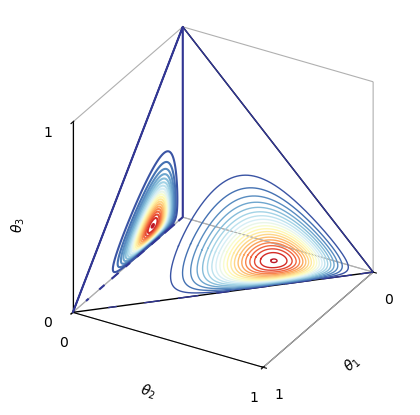

In [9]:
alpha_array = [4,8,2]
visualize_Dirichlet(alpha_array)

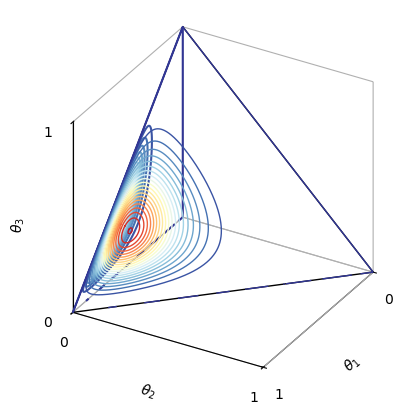

In [10]:
alpha_array = [8,2,4]
visualize_Dirichlet(alpha_array)

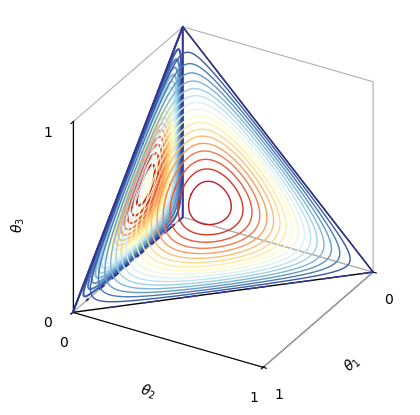

In [11]:
alpha_array = [2,2,2]
visualize_Dirichlet(alpha_array)

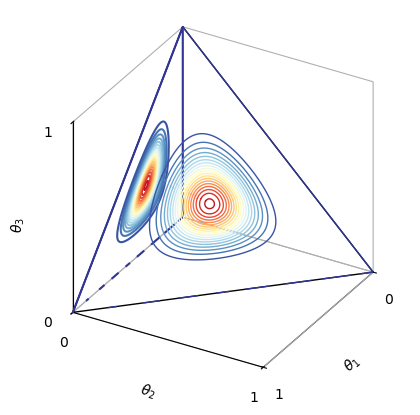

In [12]:
alpha_array = [8,8,8]
visualize_Dirichlet(alpha_array)

In [13]:
# Repo: https://github.com/Visualize-ML
# Book 2 Beauty of Visualization  |  From Basic Arithmetic to Machine Learning
# Published and copyrighted by Tsinghua University Press
# Beijing, China, 2023